<a href="https://colab.research.google.com/github/supergoa/Cap4630Repository/blob/master/HW_5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 5**
Problem 1

Summarize and describe the different concepts/methods/algorithms that you have learned in this course.

Use a Colab notebook. Make sure that you organize the material logically by using sections/subsections. Also, use code cell to include code snippets.

I suggest that you group everything into five categories:

1.   General concepts (for instance, what is artificial
intelligence, machine learning, deep learning)

2.   Basic concepts (for instance, here you can talk about linear regression, logistic regression, gradients, gradient descent)

3.   Building a model (for instance, here you can talk about the structure of a convent, what it components are etc.)

4.   Comping a model (for instance, you can talk here about optimizers, learning rate etc.)

5.   Training a model (for instance, you can talk about overfitting/underfitting)

6.   Finetuning a pretrained model (describe how you proceed)

Take this homework very seriously. You have the opportunity to make up for lost point on previous homework assignments.

# Part 1 : General Concepts

**Artificial Intelligence**

  "...is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals"(Artificial Intelligence Wikipedia). It takes feats of engineering by humans to consturct these machines in such a way that they can take inputs and rules to respond with a (seemingly) intelligent response.

**Machine Learning**
"...is the study of computer algorithms that improve automatically through experience. It is seen as a subset of artificial intelligence"(Machine Learning Wikipedia). ML alogorithms work on models that are built from training data so that the algorithm can make predicitions without explicit programming. Although ML is seen as a subset of AI, it still hinges on humans being able to construct models in a way such that the models can take in inputs and rules to produce a (seemingly) intelligent response.
  

**Deep Learning**
"...is part of a broader family of machine learning methods based on artificial neural networks with representation learning"(Deep Learning Wikipedia). Within this family includes architectures such as nueral networks and convolutional nueral networks. Deep learning is also a subset of machine learning, as it focuses on using networks that are able to learn without supervision.
  

# Part 2 : Basic Concepts

**Linear Regression**

  Linear regression models are ones that produce an output that is a linear combination of the input. A linear function takes the form seen below:
  $$ \hat y = w_1 x_1 + w_2 x_2 + ... + b $$
Linear models are simple to learn and use which is why they are commonly studied first when introduced to ML. These types of models are usful when the input features correspond linearly with the value you a trying to predict.

**Logistic Regression**

Logistic regression models are ones that classify an input into one of two groups. This is done by regressing a probability value with the sigmoid function (a number bewteen 0 and 1). Values closer to 0 predict the input belongs to group 1, while values closer to 1 predict the input belongs to group 2. The sigmoid function is simply applied to the linear combination of weights and biases.

Sigmoid function: $ \sigma(x) = \frac{1}{1 + e^{-x}} $


Output: $ \sigma(w_1 x_1 + w_2 x_2 + ... + b )$



**Gradients**

  A gradient is simply a vector which contains each partial derivative of the specified function. For example, if we had a function:

$ f(x, y , x)$

Then,

$ \triangledown f(x, y , x) = [ \frac{\delta f}{\delta x}, \frac{\delta f}{\delta y}, \frac{\delta f}{\delta z}] $

Gradients are utilized in Machine Learning during a process called gradient descent. During gradient descent, we calculate the gradient at our current location to figure out which direction we should "descend." This will be discussed further in the next section.



**Gradient Descent**

Gradient descent is a method used to find local minima in complex functions. Initially one starts at a random point on the function, and then iteratively "descends" toward a local minimum. This is done by calcuating the gradient at the current location of the function. In the image below, the gradient at the starting point would be a vector that points up the hill towards the top-left blue corner. Since the gradient points upward, we step in the opposite direction of gradient to minmize our function.

This process is modulated by a hyperparameter called a learning rate. The learning rate is a small number (e.g .001) that is multiplied by the gradient so that we do not skip around the function in a hectic manner. If the learning rate is too big we will constantly overshoot (and perhaps never hit) the nearby local minimum.

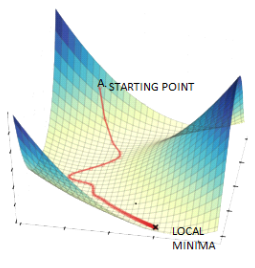

Below is a snippet of how the weights are updated during linear regression gradient descent:

In [0]:
weight = initial_weight

for epoch in range(epochs):
    gradient = 1/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - lr * gradient

Gradient descent is closely tied to the idea of a loss function, which is how one measures the error in the current model. The goal then of gradient descent is to tweak the parameters of the loss function by determining the opposite direction of its gradient and nudging the parameters in that direction.

To see more explicitely how a loss function's gradient is determined, see the following example of linear regression with a single feature:
(taken from https://github.com/schneider128k/machine_learning_course/blob/master/slides/linear_regression_simple.pdf)

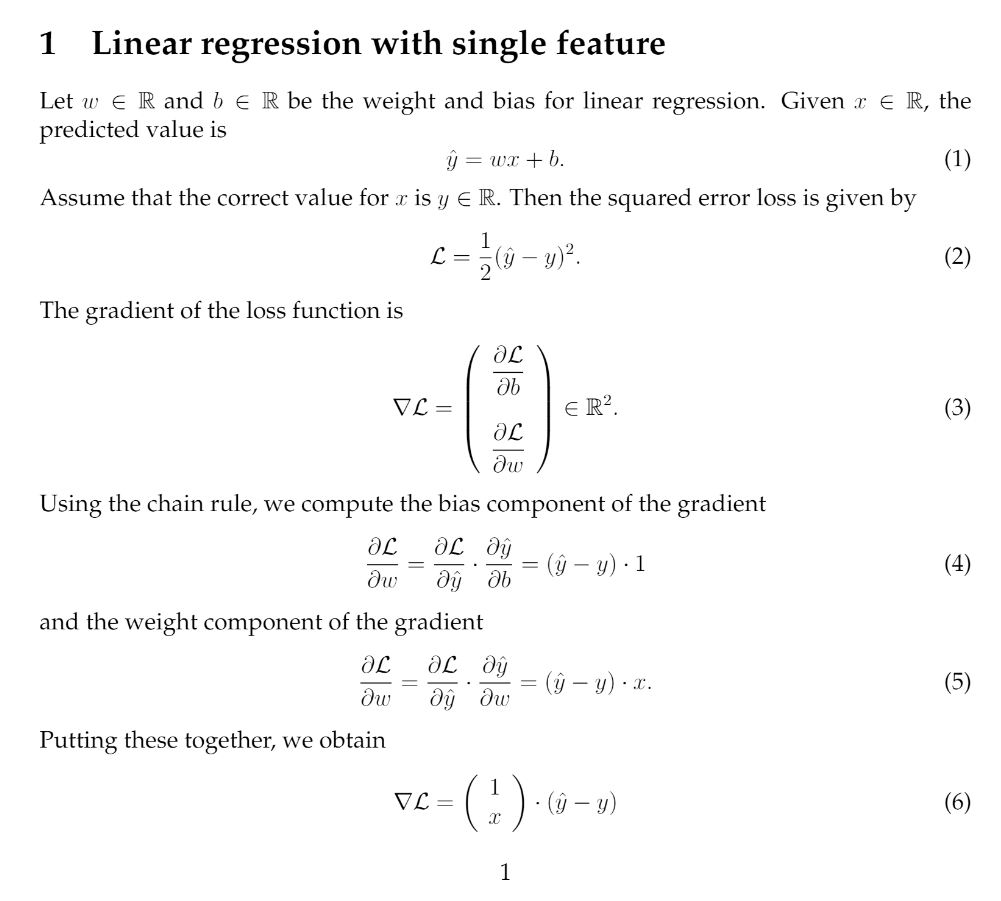

# Part 3 : Building a Model

The kind of model one builds depends on what kind of data you will be working with. Typically one will use ConvNets when working with images and other pictoral data, and one will use nueral nets otherwise.

**Nueral Nets**

The most basic nueral net consists of a an input layer, a hidden layer, and an output layer. 

An **input layer** takes the shape of your input as a way for you to pass your data into the model. 

A **hidden layer** is a layer in between input layers and output layers and they are normally fully connected. Typically these layers add complexity to the model to capture more abstract features. Adding too many hidden layers will hinder performance and predictions.

An **output layer** takes the shape of the data you are attemping to predict. Sometimes it is crucial for an activation function to characterize the output layer. For example, in binary classification, the activation function on the output must be the sigmoid activation.

Below is a short code snippet for a basic nueral net with the objective of binary classification.

In [0]:
model = Sequential()
model.add(Dense(12, input_shape=8, activation='relu')) #input
model.add(Dense(8, activation='relu')) #hidden
model.add(Dense(1, activation='sigmoid')) #output
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Here is another way to visualize a nueral net (taken from Google images)

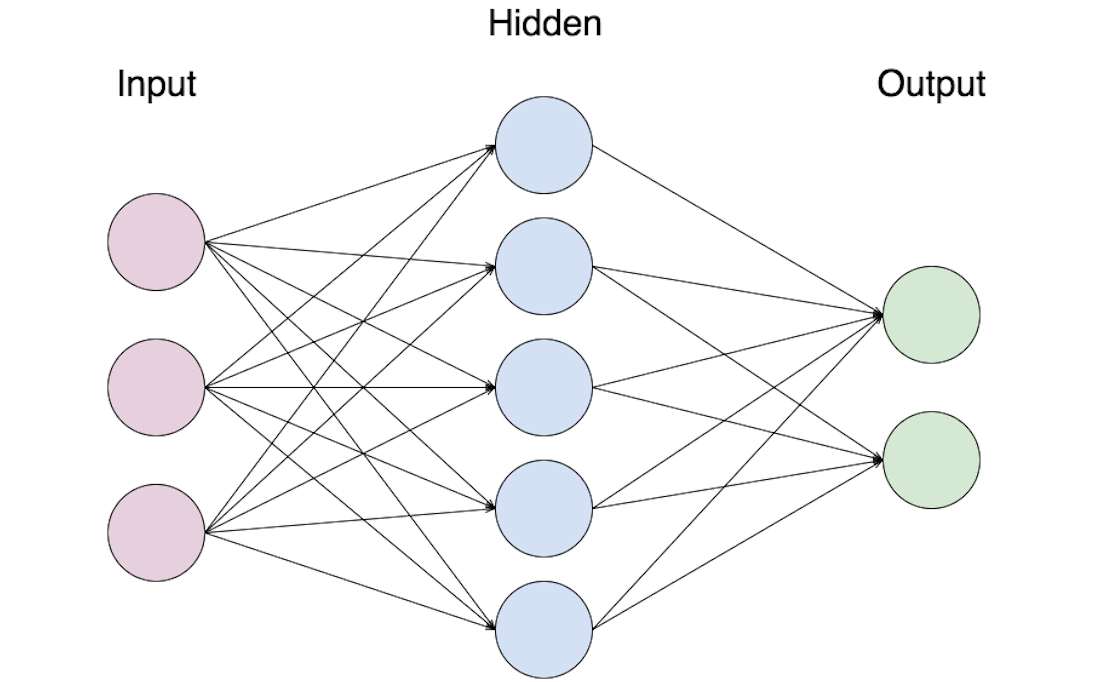

**ConvNets**

Convnets are made up of convolutional layers, pooling (or subsampling) layers, and classification layers.

Convolutional and pooling layers are used for extracting features within images. In a convolutional layer, a filter is convolved with an input images to produce a feature map. Filters are used to extract features such are specific curves, or shapes.

The picture below shows a filter (in yellow) extracting a curve feature. When the filter is placed over a curve like this, the resulting convolutional value will be high. If the filter was instead centered on the nose, the convolutional value would be low. (taken from https://adeshpande3.github.io/) 

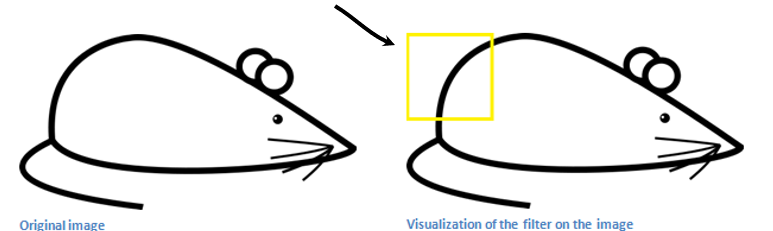

This feature map are then pooled which will decrease the dimensions of the working data. The purpose for this is to hide some data from the model to make it more robust against overfitting. There are many ways to pool. Two of the most common pooling operations are Max pooling and Average pooling. See a visualization of Max pooling below (taken from Google Images):

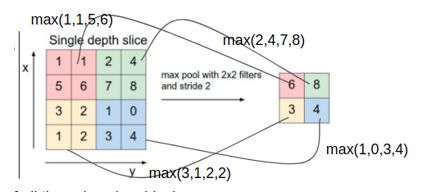

Lastly ConvNets will have classification layers that transform the pictoral data into the form of the prediction one is trying to make. One example of this could be that it first flattens the image (by turning it into a 1D vector) and the classifying it into one of N groups. See a gneralization of a ConvNet below (taken from Google images):

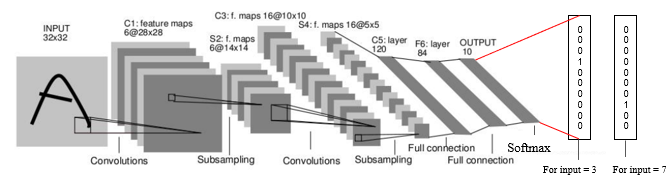

# Part 4 : Compiling a Model

**Loss Function**

As touched on previously, a loss function is what your model will attempt to minimize during training. There are many loss functions and each serve different purposes. For example, binary crossentropy is a common loss function when performing binary classifcation.

The most rudimentary loss function is called the Mean Squared Error (MSE) defined by:

$ L_{MSE} = \frac{1}{2} (\hat y - y)^2 $

MSE prioritizes lowering large deviations from the label because larger deviations are exacerbated by the square.



**Optimizers**

Optimizers control how the model responds to the loss function. The most common one and the one studied in this course is SGD in which we compute the gradient of the loss function with respect to each weight in the model. Keras has many optimizers depending on the type of model one is consturcting.

**Learning Rate**

The learning rate is a hyperparamter that is passed into the optimizer of the model. Its job is to control how fast the model adjusts its weights. As discussed previously, if the learning rate is too high, we can skip around too hectically and miss the local minimum. If the learning rate is too low, the model will take a long time to train.

In [0]:
model.compile(loss='mean_squared_error', optimizer=optimizers.SGD(lr=1e-4))

# Part 5 : Training a Model


Training a model occurs with the model.fit() function which takes in your training data and training labels.

In [0]:
model.fit(train_data, train_label, epochs=200, batch_size=20)

Models can then be evaluated on the testing dataset with model.evaluate().

In [0]:
test_loss, test_acc = model.evaluate(test_data, test_label)

Two problems commonly occur during the training phase: overfitting and underfitting.

**Overfitting**

 Overfitting occurs when one's model is too complicated for the task at hand. When this occurs, your model will learn the training data too well, at the expense of being gerneralizable (and even performing poorly on the testing dataset). There are quite a few ways to tackle overfitting. One can clean their training data by removing outliers or doubled features. Additionally, one can simplify their model by removing hidden layers and changing the input size of various layers.

**Underfitting**

Underfitting occurs when the model is not complex enough to represent the task at hand. When this occurs, the model will have a poor accuracy n the training dataset, or it may take a very long time to train. A possible solution to underfitting involves increasing the complexity of the model. Another solution involves using (or partly using) a pretained model.

# Part 6 : Finetuning a Model

Finetuning referrs to increasing the accuracy of a pretrained model for a particular situation. Keras comes with many pretrained bases under keras.application.

In HW4, we used two mechanisms the finetune the prexisting models. One of which is modifying the layers of the model. In HW4, I used the Xception base.

Before:

In [0]:
conv_base = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

After:

In [0]:
conv_base = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

Modifying the layers like this is what we would do to adapt the conv_base to our particular situation. This could be binary classification for example.

The other mechanism we used was the unfreezing of particular top layers:

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'conv2d_3':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

Here I unfroze layers above conv2d_3, allowing them to adjust their weights during training. It is important to keep the conv base locked during training or it could change and ruin the purpose of using a pretrained model.

After training, it is imporant to check that your changes increased the accuracy of the model for your paricular situation. If this is not the case, it would have been better to use the vanilla conv_base without modifying it.